# Machine Learning for Time Series Data in Python

Time series data is ubiquitous. Whether it be stock market fluctuations, sensor data recording climate change, or activity in the brain, any signal that changes over time can be described as a time series. Machine learning has emerged as a powerful method for leveraging complexity in data in order to generate predictions and insights into the problem one is trying to solve. This course is an intersection between these two worlds of machine learning and time series data, and covers feature engineering, spectograms, and other advanced techniques in order to classify heartbeat sounds and predict stock prices.

## Table of Contents

- [Introduction](#intro)
- [ML Basics](#ml)
- [Datasets for the course](#data)
- [Classication and feature engineering](#class)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

path = "data/dc30/"

---
<a id='intro'></a>

<img src="images/ts4_001.png" alt="" style="width: 800px;"/>

<img src="images/ts4_002.png" alt="" style="width: 800px;"/>

<img src="images/ts4_003.png" alt="" style="width: 800px;"/>

<img src="images/ts4_004.png" alt="" style="width: 800px;"/>

## Plotting a time series (I)

In this exercise, you'll practice plotting the values of two time series without the time component.

Two DataFrames, `data` and `data2` are available in your workspace.

Unless otherwise noted, assume that all required packages are loaded with their common aliases throughout this course.

In [2]:
data = pd.read_csv(path+'data.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
data.head()

,data_values
0,214.009998
1,214.379993
2,210.969995
3,210.580000
4,211.980005


In [3]:
data2 = pd.read_csv(path+'data2.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
data2.head()

,data_values
0,-0.006928
1,-0.007929
2,-0.008900
3,-0.009815
4,-0.010653


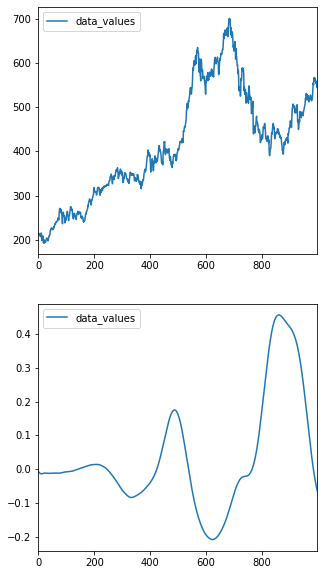

In [4]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(y='data_values', ax=axs[0])
data2.iloc[:1000].plot(y='data_values', ax=axs[1])
plt.show();

## Plotting a time series (II)

You'll now plot both the datasets again, but with the included time stamps for each (stored in the column called "time"). Let's see if this gives you some more context for understanding each time series data.

In [5]:
data = pd.read_csv(path+'data_t.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
data.head()

,time,data_values
0,2010-01-04,214.009998
1,2010-01-05,214.379993
2,2010-01-06,210.969995
3,2010-01-07,210.580000
4,2010-01-08,211.980005


In [6]:
data2 = pd.read_csv(path+'data2_t.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
data2.head()

,data_values,time
0,-0.006928,0.000000
1,-0.007929,0.000045
2,-0.008900,0.000091
3,-0.009815,0.000136
4,-0.010653,0.000181


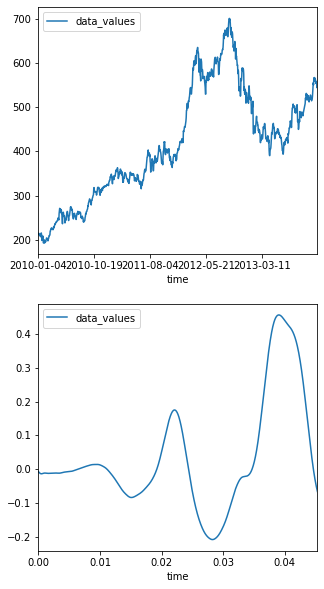

In [7]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(x='time', y='data_values', ax=axs[0])
data2.iloc[:1000].plot(x='time', y='data_values', ax=axs[1])
plt.show();

As you can now see, each time series has a very different sampling frequency (the amount of time between samples). The first is daily stock market data, and the second is an audio waveform.

---
<a id='ml'></a>

## ML Basics

<img src="images/ts4_005.png" alt="" style="width: 800px;"/>

<img src="images/ts4_006.png" alt="" style="width: 800px;"/>

## Fitting a simple model: classification
In this exercise, you'll use the iris dataset (representing petal characteristics of a number of flowers) to practice using the scikit-learn API to fit a classification model. You can see a sample plot of the data to the right.

In [8]:
data = pd.read_csv(path+'iris.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [9]:
from sklearn.svm import LinearSVC

# Construct data for the model
X = data[['petal length (cm)', 'petal width (cm)']]
y = data[['target']]

# Fit the model
model = LinearSVC()
model.fit(X, y)

/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

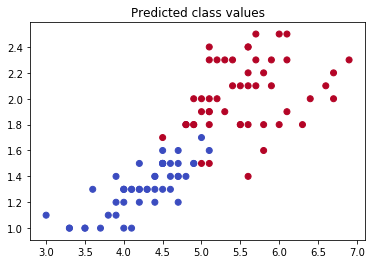

In [13]:
plt.scatter(X['petal length (cm)'], X['petal width (cm)'],
            c=y['target'], cmap=plt.cm.coolwarm)
plt.title("Predicted class values")
plt.show;

## Predicting using a classification model

Now that you have fit your classifier, let's use it to predict the type of flower (or class) for some newly-collected flowers.

Information about petal width and length for several new flowers is stored in the variable `targets`. Using the classifier you fit, you'll predict the type of each flower.

In [10]:
targets = pd.read_csv(path+'iris_test.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
targets.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
116,6.5,3.0,5.5,1.8,2
142,5.8,2.7,5.1,1.9,2
148,6.2,3.4,5.4,2.3,2
67,5.8,2.7,4.1,1.0,1
133,6.3,2.8,5.1,1.5,2


[2 2 2 1 1 2 2 2 2 1 2 1 1 2 1 1 2 1 2 2]


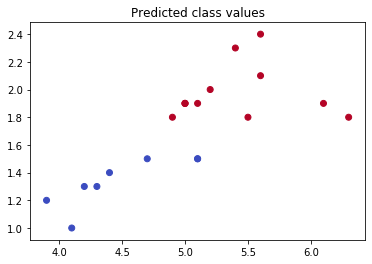

In [11]:
# Create input array
X_predict = targets[['petal length (cm)', 'petal width (cm)']]

# Predict with the model
predictions = model.predict(X_predict)
print(predictions)

# Visualize predictions and actual values
plt.scatter(X_predict['petal length (cm)'], X_predict['petal width (cm)'],
            c=predictions, cmap=plt.cm.coolwarm)
plt.title("Predicted class values")
plt.show;

Note that the output of your predictions are all integers, representing that datapoint's predicted class.

## Fitting a simple model: regression

In this exercise, you'll practice fitting a regression model using data from the Boston housing market. A DataFrame called `boston` is available in your workspace. It contains many variables of data (stored as columns). Can you find a relationship between the following two variables?

- "AGE": proportion of owner-occupied units built prior to 1940
- "RM" : average number of rooms per dwelling

Todo:
- Prepare X and y DataFrames using the data in boston.
- X should be the proportion of houses built prior to 1940, y average number of rooms per dwelling.
- Fit a regression model that uses these variables (remember to shape the variables correctly!).
- Don't forget that each variable must be the correct shape for scikit-learn to use it!

In [14]:
boston = pd.read_csv(path+'boston.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
from sklearn import linear_model

# Prepare input and output DataFrames
X = boston[['AGE']]
y = boston[['RM']]

# Fit the model
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In regression, the output of your model is a continuous array of numbers, not class identity.

## Predicting using a regression model

Now that you've fit a model with the Boston housing data, lets see what predictions it generates on some new data. You can investigate the underlying relationship that the model has found between inputs and outputs by feeding in a range of numbers as inputs and seeing what the model predicts for each input.

A 1-D array `new_inputs` consisting of 100 "new" values for "AGE" (proportion of owner-occupied units built prior to 1940) is available in your workspace along with the model you fit in the previous exercise.

In [16]:
new_inputs = np.array([   2.9       ,    3.88080808,    4.86161616,    5.84242424,
          6.82323232,    7.8040404 ,    8.78484848,    9.76565657,
         10.74646465,   11.72727273,   12.70808081,   13.68888889,
         14.66969697,   15.65050505,   16.63131313,   17.61212121,
         18.59292929,   19.57373737,   20.55454545,   21.53535354,
         22.51616162,   23.4969697 ,   24.47777778,   25.45858586,
         26.43939394,   27.42020202,   28.4010101 ,   29.38181818,
         30.36262626,   31.34343434,   32.32424242,   33.30505051,
         34.28585859,   35.26666667,   36.24747475,   37.22828283,
         38.20909091,   39.18989899,   40.17070707,   41.15151515,
         42.13232323,   43.11313131,   44.09393939,   45.07474747,
         46.05555556,   47.03636364,   48.01717172,   48.9979798 ,
         49.97878788,   50.95959596,   51.94040404,   52.92121212,
         53.9020202 ,   54.88282828,   55.86363636,   56.84444444,
         57.82525253,   58.80606061,   59.78686869,   60.76767677,
         61.74848485,   62.72929293,   63.71010101,   64.69090909,
         65.67171717,   66.65252525,   67.63333333,   68.61414141,
         69.59494949,   70.57575758,   71.55656566,   72.53737374,
         73.51818182,   74.4989899 ,   75.47979798,   76.46060606,
         77.44141414,   78.42222222,   79.4030303 ,   80.38383838,
         81.36464646,   82.34545455,   83.32626263,   84.30707071,
         85.28787879,   86.26868687,   87.24949495,   88.23030303,
         89.21111111,   90.19191919,   91.17272727,   92.15353535,
         93.13434343,   94.11515152,   95.0959596 ,   96.07676768,
         97.05757576,   98.03838384,   99.01919192,  100.        ])

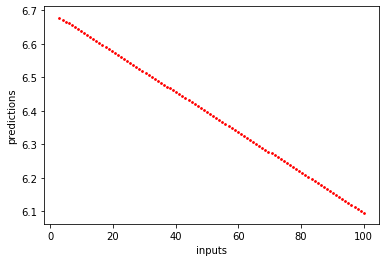

In [17]:
# Generate predictions with the model using those inputs
predictions = model.predict(new_inputs.reshape([-1,1]))

# Visualize the inputs and predicted values
plt.scatter(new_inputs, predictions, color='r', s=3)
plt.xlabel('inputs')
plt.ylabel('predictions')
plt.show();

Here the red line shows the relationship that your model found. As the proportion of pre-1940s houses gets larger, the average number of rooms gets slightly lower.

---
<a id='data'></a>

## Datasets for the course

## Inspecting the classification data

In these final exercises of this chapter, you'll explore the two datasets you'll use in this course.

The first is a collection of heartbeat sounds. Hearts normally have a predictable sound pattern as they beat, but some disorders can cause the heart to beat abnormally. This dataset contains a training set with labels for each type of heartbeat, and a testing set with no labels. You'll use the testing set to validate your models.

As you have labeled data, this dataset is ideal for classification. In fact, it was originally offered as a part of a public [Kaggle competition](https://www.kaggle.com/kinguistics/heartbeat-sounds).

In [19]:
#!pip install librosa

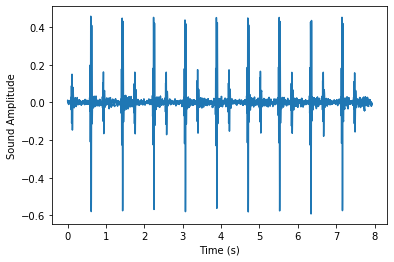

In [20]:
import librosa as lr
from glob import glob

# List all the wav files in the folder
data_dir = path + 'heartbeat-sounds/set_a'
audio_files = glob(data_dir + '/*.wav')

# Read in the first audio file, create the time array
audio, sfreq = lr.load(audio_files[0])
time = np.arange(0, len(audio)) / sfreq

# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.show();

There are several seconds of heartbeat sounds in here, though note that most of this time is silence. A common procedure in machine learning is to separate the datapoints with lots of stuff happening from the ones that don't.

## Inspecting the regression data

The next dataset contains information about company market value over several years of time. This is one of the most popular kind of time series data used for regression. If you can model the value of a company as it changes over time, you can make predictions about where that company will be in the future. This dataset was also originally provided as part of a public [Kaggle competition](https://www.kaggle.com/dgawlik/nyse).

In this exercise, you'll plot the time series for a number of companies to get an understanding of how they are (or aren't) related to one another.

                  AAPL  FB       NFLX          V        XOM
time                                                       
2010-01-04  214.009998 NaN  53.479999  88.139999  69.150002
2010-01-05  214.379993 NaN  51.510001  87.129997  69.419998
2010-01-06  210.969995 NaN  53.319999  85.959999  70.019997
2010-01-07  210.580000 NaN  52.400001  86.760002  69.800003
2010-01-08  211.980005 NaN  53.300002  87.000000  69.519997


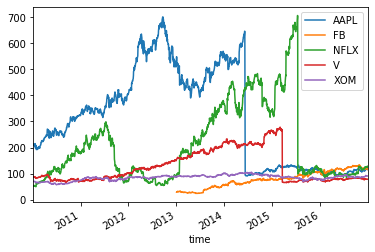

In [22]:
# Read in the data
data = pd.read_csv(path+'prices.csv', index_col=0)

# Convert the index of the DataFrame to datetime
data.index = pd.to_datetime(data.index)
print(data.head())

# Loop through each column, plot its values over time
fig, ax = plt.subplots()
for column in data.columns:
    data[column].plot(ax=ax, label=column)
ax.legend()
plt.show();

Note that each company's value is sometimes correlated with others, and sometimes not. Also note there are a lot of 'jumps' in there - what effect do you think these jumps would have on a predictive model?

---
<a id='class'></a>

## Classication and feature engineering

<img src="images/ts4_007.png" alt="" style="width: 800px;"/>

<img src="images/ts4_008.png" alt="" style="width: 800px;"/>

<img src="images/ts4_009.png" alt="" style="width: 800px;"/>

<img src="images/ts4_010.png" alt="" style="width: 800px;"/>

<img src="images/ts4_011.png" alt="" style="width: 800px;"/>

<img src="images/ts4_012.png" alt="" style="width: 800px;"/>

<img src="images/ts4_013.png" alt="" style="width: 800px;"/>

## Many repetitions of sounds

In this exercise, you'll start with perhaps `the simplest classification technique: averaging across dimensions of a dataset and visually inspecting the result`.

You'll use the heartbeat data described in the last chapter. Some recordings are normal heartbeat activity, while others are abnormal activity. Let's see if you can spot the difference.

Two DataFrames, normal and abnormal, each with the shape of (n_times_points, n_audio_files) containing the audio for several heartbeats are available in your workspace. Also, the sampling frequency is loaded into a variable called sfreq. A convenience plotting function show_plot_and_make_titles() is also available in your workspace.

- First, create the time array for these audio files (all audios are the same length).
- Then, stack the values of the two DataFrames together (normal and abnormal, in that order) so that you have a single array of shape (n_audio_files, n_times_points).
- Finally, use the code provided to loop through each list item / axis, and plot the audio over time in the corresponding axis object.
- You'll plot normal heartbeats in the left column, and abnormal ones in the right column

In [25]:
normal = pd.read_csv(path+'normal.csv', 
            index_col='time',
            parse_dates=True)
normal.head()

,3,4,6
time,,,
0.000000,-0.000995,0.000281,0.002953
0.000454,-0.003381,0.000381,0.003034
0.000907,-0.000948,0.000063,0.000292
0.001361,-0.000766,0.000026,-0.005916
0.001814,0.000469,-0.000432,-0.005307


In [26]:
abnormal = pd.read_csv(path+'abnormal.csv', 
            index_col='time',
            parse_dates=True)
abnormal.head()

,0,1,2
time,,,
0.000000,-0.024684,-0.024507,0.008254
0.000454,-0.060429,-0.047736,0.014809
0.000907,-0.070080,-0.039938,0.010475
0.001361,-0.084212,-0.041199,0.010272
0.001814,-0.085111,-0.036050,0.008580


In [30]:
sfreq = 2205

In [23]:
#import inspect
#source = inspect.getsource(show_plot_and_make_titles)

def show_plot_and_make_titles():
    axs[0, 0].set(title="Normal Heartbeats")
    axs[0, 1].set(title="Abnormal Heartbeats")
    plt.tight_layout()
    plt.show();  

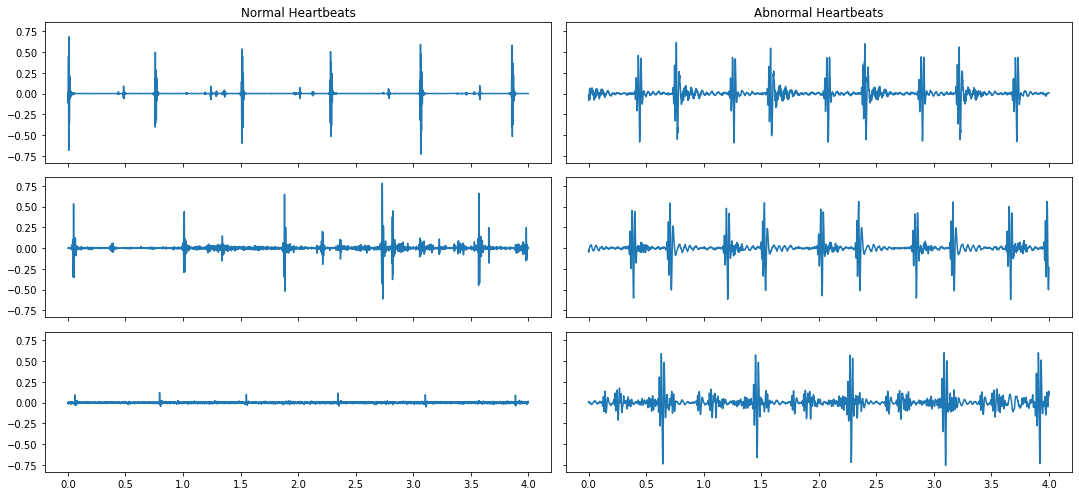

In [32]:
fig, axs = plt.subplots(3, 2, figsize=(15, 7), sharex=True, sharey=True)

# Calculate the time array
time = np.arange(normal.shape[0]) / sfreq

# Stack the normal/abnormal audio so you can loop and plot
stacked_audio = np.hstack([normal, abnormal]).T

# Loop through each audio file / ax object and plot
# .T.ravel() transposes the array, then unravels it into a 1-D vector for looping
for iaudio, ax in zip(stacked_audio, axs.T.ravel()):
    ax.plot(time, iaudio)
show_plot_and_make_titles()

As you can see there is a lot of variability in the raw data, let's see if you can average out some of that noise to notice a difference.

## Invariance in time

While you should always start by visualizing your raw data, this is often uninformative when it comes to discriminating between two classes of data points. Data is usually noisy or exhibits complex patterns that aren't discoverable by the naked eye.

Another common technique to find simple differences between two sets of data is to average across multiple instances of the same class. This may remove noise and reveal underlying patterns (or, it may not).

In this exercise, you'll average across many instances of each class of heartbeat sound.

The two DataFrames (normal and abnormal) and the time array (time) from the previous exercise are available in your workspace.

- Average across the audio files contained in normal and abnormal, leaving the time dimension.
- Visualize these averages over time.

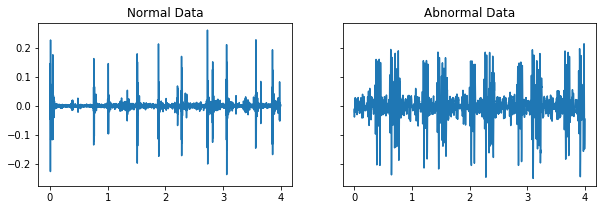

In [33]:
# Average across the audio files of each DataFrame
mean_normal = np.mean(normal, axis=1)
mean_abnormal = np.mean(abnormal, axis=1)

# Plot each average over time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
ax1.plot(time, mean_normal)
ax1.set(title="Normal Data")
ax2.plot(time, mean_abnormal)
ax2.set(title="Abnormal Data")
plt.show();

Do you see a noticeable difference between the two? Maybe, but it's quite noisy. Let's see how you can dig into the data a bit further.

## Build a classification model

While eye-balling differences is a useful way to gain an intuition for the data, let's see if you can operationalize things with a model. In this exercise, you will use each repetition as a datapoint, and each moment in time as a feature to fit a classifier that attempts to predict abnormal vs. normal heartbeats using only the raw data.

We've split the two DataFrames (normal and abnormal) into X_train, X_test, y_train, and y_test.

- Create an instance of the Linear SVC model and fit the model using the training data.
- Use the testing data to generate predictions with the model.
- Score the model using the provided code.

In [35]:
stacked_audio[:10]

array([[-9.95218987e-04, -3.38075217e-03, -9.47843189e-04, ...,
        -2.32990569e-04, -1.03341197e-04, -3.67499451e-04],
       [ 2.80759443e-04,  3.80784913e-04,  6.25667381e-05, ...,
        -5.90919633e-04, -1.31961866e-03,  6.51859853e-04],
       [ 2.95301457e-03,  3.03359400e-03,  2.91513745e-04, ...,
         1.68087184e-02,  8.76232889e-03,  4.44242451e-03],
       [-2.46844683e-02, -6.04289919e-02, -7.00800568e-02, ...,
         7.95730669e-03,  6.44497853e-03,  6.52934378e-03],
       [-2.45074201e-02, -4.77363952e-02, -3.99383977e-02, ...,
        -3.17170024e-01, -2.75164455e-01, -2.33864069e-01],
       [ 8.25388916e-03,  1.48086222e-02,  1.04754260e-02, ...,
         1.24177605e-01,  1.09529600e-01,  9.06286910e-02]])

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.svm import LinearSVC

# Initialize and fit the model
model = LinearSVC()
model.fit(X_train, y_train)

# Generate predictions and score them manually
predictions = model.predict(X_test)
print(sum(predictions == y_test.squeeze()) / len(y_test))

In [ ]:
0.555555555556

Note that your predictions didn't do so well. That's because the features you're using as inputs to the model (raw data) aren't very good at differentiating classes. Next, you'll explore how to calculate some more complex features that may improve the results.

In [ ]:
<img src="images/ts4_014.png" alt="" style="width: 800px;"/>

In [ ]:
---
<a id='intro'></a>